# Pandas

## 1) Series 

In [1]:
import numpy as np
import pandas as pd

In [3]:
labels = ['a', 'b', 'c']
my_data = [10,20,30]
d = dict(zip(labels, my_data))
print(d)

{'a': 10, 'b': 20, 'c': 30}


In [4]:
arr = np.array(my_data)
print(arr)

[10 20 30]


#### Panda Series with lists:

In [5]:
pd.Series(my_data)

0    10
1    20
2    30
dtype: int64

In [6]:
pd.Series(my_data, labels)

a    10
b    20
c    30
dtype: int64

#### Panda Series are labelled (numpy arrays / python lists are not)

#### Panda Series with arrays:

In [7]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [8]:
pd.Series(arr, labels)

a    10
b    20
c    30
dtype: int32

#### Panda Series with dictionaries:

In [9]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

#### Indexing Panda Series + merging:

In [10]:
ser1 = pd.Series([num for num in range(1,5)], ['USA', 'GER', 'USSR', 'JAP', ])
print(ser1)

USA     1
GER     2
USSR    3
JAP     4
dtype: int64


In [11]:
ser2 = pd.Series([num for num in range (5,9)], ['USA', 'GER', 'ITA', 'JAP'])
ser2

USA    5
GER    6
ITA    7
JAP    8
dtype: int64

In [12]:
ser1['USA']

1

In [13]:
ser2['USA']

5

In [14]:
ser1 + ser2

GER      8.0
ITA      NaN
JAP     12.0
USA      6.0
USSR     NaN
dtype: float64

#### Explanation: if it didn't find a match, it puts NaN ('not a number': a numeric data type used to represent any value that is undefined or unpresentable) as output

<br>

## 2) DataFrames

In [47]:
# import pandas as pd

In [15]:
from numpy.random import randn
np.random.seed(101)

In [16]:
df = pd.DataFrame(randn(5,4), ['A', 'B', 'C', 'D', 'E'], ['W', 'X', 'Y', 'Z'])

In [17]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Dataframe = collection of Series

#### Selecting columns:

In [18]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

#### = Pandas Series

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
type(df['W'])

pandas.core.series.Series

In [21]:
df[['W', 'X']]

,W,X
A,2.706850,0.628133
B,0.651118,-0.319318
C,-2.018168,0.740122
D,0.188695,-0.758872
E,0.190794,1.978757


#### Creating and deleting new column:

In [22]:
df['sum_W_Y'] = df['W'] + df['Y']

In [23]:
df

,W,X,Y,Z,sum_W_Y
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [24]:
df.drop('sum_W_Y', axis = 1, inplace = True)

#### axis = 1 refers to columns (axis = 0 refers to rows) <br>
#### inplace set to True to update df

In [25]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Deleting rows:

In [26]:
df.drop('E')    # I do not want to update the initial df, so no inplace = True

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


#### Selecting rows:

In [27]:
df.loc['C']

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

#### So: columns AND rows are series

In [28]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

#### If label can't be found but we know which row/column to select

#### Selecting single values and subsets of our dataframe:

In [29]:
df.loc['B', 'Y']

-0.8480769834036315

In [30]:
df.loc[['B', 'C'], ['X','Y']]

,X,Y
B,-0.319318,-0.848077
C,0.740122,0.528813


#### Conditional selection:

In [31]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [32]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [33]:
df['W'] > 0

A     True
B     True
C    False
D     True
E     True
Name: W, dtype: bool

In [34]:
df[df['W'] > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Row C does not display anymore (the boolean value was 'False' because it's lower than 0)

In [35]:
df[df['W'] > 0][['W', 'X']]

,W,X
A,2.706850,0.628133
B,0.651118,-0.319318
D,0.188695,-0.758872
E,0.190794,1.978757


#### Multiple conditions:

and

In [36]:
df[(df['W'] > 0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


or

In [37]:
df[(df['W'] > 0) | (df['Y'] > 1)]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### More about indexing:

In [38]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Reset index:

In [42]:
df.reset_index() # inplace = True (but I do not want to reset index at this moment)

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [43]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [45]:
new_index = 'CA NY WY OR CO'.split()
new_index

['CA', 'NY', 'WY', 'OR', 'CO']

In [46]:
df['States'] = new_index

In [47]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


#### Now I want to replace index (A, B,...) with the States abbrev.'s

In [49]:
df.set_index('States') # again: inplace = True if we want to change original df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [50]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


#### Multi-index and index hierachy

In [52]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside)) # list of tuple pairs
hier_index = pd.MultiIndex.from_tuples(hier_index) # creating multi-index

In [53]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [60]:
df = pd.DataFrame(randn(6,2), hier_index, ['A', 'B'])
df

A         B
G1 1 -0.497104 -0.754070
   2 -0.943406  0.484752
   3 -0.116773  1.901755
G2 1  0.238127  1.996652
   2 -0.993263  0.196800
   3 -1.136645  0.000366

In [63]:
df.index.names = ['Groups', 'Numbers']
df

A         B
Groups Numbers                    
G1     1       -0.497104 -0.754070
       2       -0.943406  0.484752
       3       -0.116773  1.901755
G2     1        0.238127  1.996652
       2       -0.993263  0.196800
       3       -1.136645  0.000366

#### Start indexing from outside --> work inwards

In [65]:
df.loc['G1'].loc[1].loc['A']

-0.49710402288933153

#### What if we want to display both number 1 rows (G1 - row 1 & G2 - row 1)? <br>
#### That becomes a lot easier if we take the cross-section of dataframes:


In [72]:
df.xs(1, level = 'Numbers')

,A,B
Groups,,
G1,-0.497104,-0.754070
G2,0.238127,1.996652


<br>

## 3) Missing data

In [46]:
# import pandas as pd

In [76]:
df = pd.DataFrame(
    {
     'A':[1,2,np.nan],      # np.nan --> missing or null value
     'B':[5,np.nan,np.nan],
     'C':[1,2,3]
    }
)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


#### Drop rows with missing values:

In [77]:
df.dropna()

,A,B,C
0,1.0,5.0,1


#### Drop columns with missing values:

In [78]:
df.dropna(axis = 1)

,C
0,1
1,2
2,3


#### Using a treshold of 2 missing values for rows:

In [79]:
df.dropna(thresh = 2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


#### Filling in missing value (A2) with, as an example, the mean of column A:

In [81]:
df['A'].fillna(value = df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

<br>

## 4) Groupby

In [45]:
# import pandas as pd

In [22]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
print(data)

{'Company': ['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'], 'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'], 'Sales': [200, 120, 340, 124, 243, 350]}


In [23]:
df = pd.DataFrame(data)
print(df)

  Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350


#### Group data by company

In [24]:
grouped_df = df.groupby('Company')

##### on average sale

In [25]:
grouped_df.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


##### on sum

In [26]:
grouped_df.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


##### How many sales per company?

In [42]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


#### Describe grouped-by-company dataframe:

In [43]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

<br>

## 5) Concatenating, merging and joining

In [44]:
#import pandas as pd

In [54]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [55]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7]) 
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [57]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


#### Concat: each dataframe has the same dimension (4x4) --> concat possible

In [63]:
df_concat = pd.concat([df1, df2, df3])
df_concat

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### Merging dataframes:

In [75]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [76]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']}) 
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [77]:
pd.merge(left, right, how='inner', on='key')   
# 'inner join' left & right dataframe on shared key --> for more information:
# please see my_first_MySQL_projects

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


#### Merging dataframes with multiple keys:

In [78]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [79]:
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [80]:
pd.merge(left, right, on=['key1', 'key2']) # default = inner join

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Joining dataframes: (we join dataframes based on index instead of columns as in merge)

In [81]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [82]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [83]:
left.join(right)   # default = inner join

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [84]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


<br>

## 6) Operations

In [11]:
# import pandas as np

### Unique values

In [12]:
df = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xyz']
                  })
df


,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


#### Finding all unique values in column 2:

In [13]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

#### Finding how many unique values in column 2:

In [14]:
df['col2'].nunique()

3

#### Displaying unique values and how many times it occurs in the dataframe

In [15]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting data

In [16]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [22]:
df[(df['col1'] > 2) & (df['col2'] == 444)]

,col1,col2,col3
3,4,444,xyz


### Applying (self-made) functions to dataframes via .apply

In [30]:
def times2(x):
    return x*2

In [31]:
df['col1'].apply(times2)    # can also be done via lambda expressions!

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [32]:
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [33]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

### Removing columns

In [39]:
df.drop('col1', axis=1) # inplace = True if we want to make the change permanent

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


### Sorting values within dataframe

In [40]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [42]:
df.sort_values('col2', ascending = False)

,col1,col2,col3
2,3,666,ghi
1,2,555,def
0,1,444,abc
3,4,444,xyz


### Pivot table

In [44]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [48]:
pivot1 = df.pivot_table(values = 'D', index = ['A', 'B'], columns = ['C'])
pivot1

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

### Search for and fill in null values within dataframe


In [53]:
pivot1.isnull()

C            x      y
A   B                
bar one  False  False
    two   True  False
foo one  False  False
    two  False   True

In [54]:
pivot1.fillna('FILLED')

C             x       y
A   B                  
bar one       4       1
    two  FILLED       5
foo one       1       3
    two       2  FILLED

<br>

## 7) Data input and output

In [64]:
# import pandas as pd

### CSV files

In [61]:
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [67]:
df.to_csv('my_output.csv', index = False)

In [71]:
pd.read_csv('my_output.csv')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


### Excel files

In [69]:
df = pd.read_excel('Excel_Sample.xlsx', sheet_name = 'Sheet1')
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [70]:
df.to_excel('excel_output.xlsx', sheet_name = 'Sheet2')

### HTML files

In [76]:
data = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')
data[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


<br>

## 8) Business challenges

### 8.1. SF Salaries

#### Made possible thanks to the SF Salaries Dataset from Kaggle (https://www.kaggle.com/kaggle/sf-salaries)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


#### What is the average basepay?

In [11]:
df['BasePay'].mean()

66325.44884050643

#### What is the max overtime pay?

In [12]:
df['OvertimePay'].max()

245131.88

#### What is the job title of JOSEPH DRISCOLL? And how much does he make (including benefits)?

In [20]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [21]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

#### Who is the highest and lowest paid person (including benefits)?

In [23]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [24]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


#### What was the average BasePay of all employees per year from 2011-2014?

In [28]:
df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

#### How many unique job titles are there?

In [30]:
df['JobTitle'].nunique()

2159

#### What are the 5 most common jobs?

In [32]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

 #### How many job titles were represented by only one person in 2013?

In [39]:
sum(df[df['Year'] == 2013]['JobTitle'].value_counts() == 1)

202

#### How many people are a 'chief'?

In [40]:
def find_chief(job_title):
    if "chief" in job_title.lower():
        return True
    else:
        return False

In [48]:
sum(df['JobTitle'].apply(find_chief))

627

#### Is there a correlation between length of the job titles and salary?

In [52]:
df['length_title'] = df['JobTitle'].apply(len)

In [53]:
df[['length_title', 'TotalPayBenefits']].corr()

,length_title,TotalPayBenefits
length_title,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


<br>

<br>

### 8.2. E-commerce purchases

In [7]:
# import pandas as pd

In [10]:
ecom = pd.read_csv("Ecommerce Purchases")

In [11]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [12]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


#### What is the email of the person with the following Credit Card Number: 4926535242672853?

In [13]:
ecom[ecom["Credit Card"] == 4926535242672853]["Email"]

1234    bondellen@williams-garza.com
Name: Email, dtype: object

#### How many people have American Express as their Credit Card Provider and made a purchase above 95?

In [14]:
ecom[(ecom["CC Provider"] == "American Express") & (ecom["Purchase Price"] > 95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

#### What are the 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...)?

In [17]:
def split_email(email):
    return email.split('@')[1]

In [18]:
ecom["Email"].apply(split_email).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

<br>

## 9) Data visualisation

In [48]:
# import numpy as np
# import pandas as pd
# %matplotlib inline
# import seaborn as sns

In [49]:
df1 = pd.read_csv('df1',index_col=0)
df2 = pd.read_csv('df2')

In [50]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [51]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


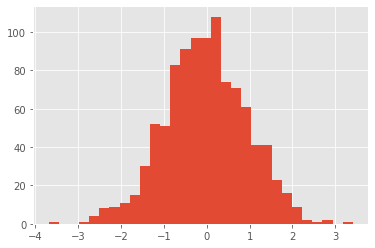

In [52]:
df1['A'].hist(bins = 30)

### Style sheets

In [53]:
import matplotlib.pyplot as plt

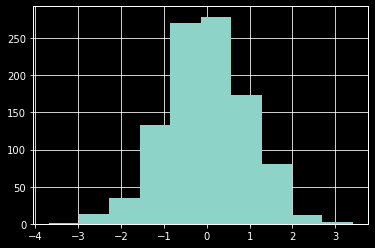

In [54]:
plt.style.use('dark_background')
df1['A'].hist()

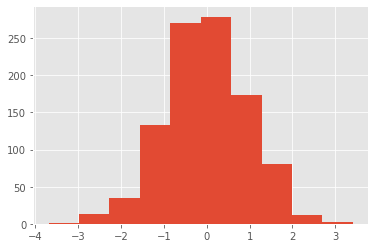

In [55]:
plt.style.use('ggplot')
df1['A'].hist()

### Plot types

#### Area plot

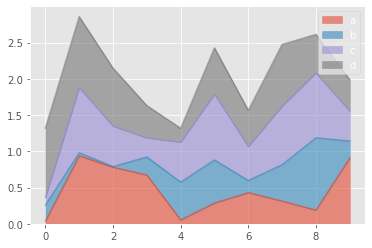

In [56]:
df2.plot.area(alpha=0.6)

#### Bar plot

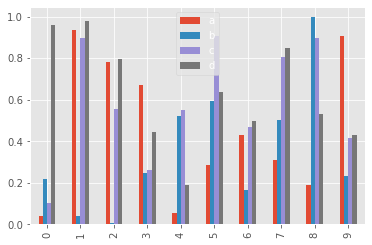

In [57]:
df2.plot.bar()

#### Histogram

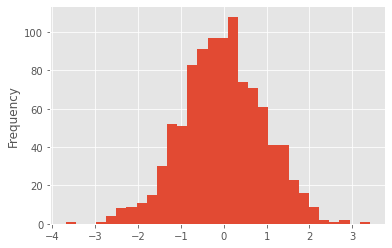

In [58]:
df1['A'].plot.hist(bins=30)

#### Line plot

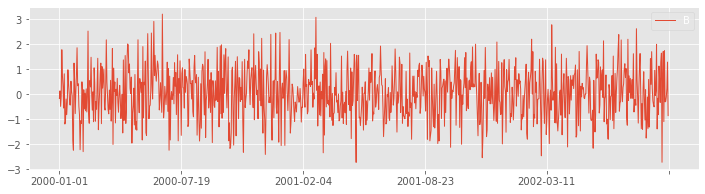

In [59]:
df1.plot.line(y = 'B', figsize = (12,3), lw = 1)

#### Scatter plot

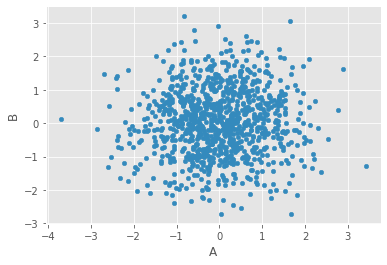

In [60]:
df1.plot.scatter(x='A',y='B')

##### We can use c to colour based off another column value:

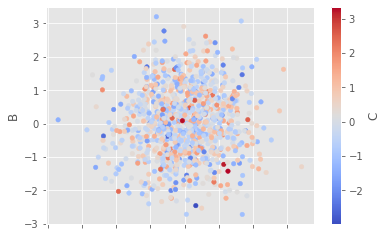

In [61]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

##### Or use s to indicate size based off another column. s parameter needs to be an array, not just the name of a column:

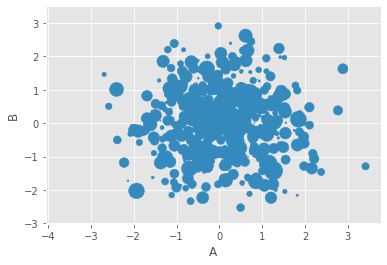

In [63]:
df1.plot.scatter(x = 'A', y = 'B', s = (df1['C']*100))

#### Box plot

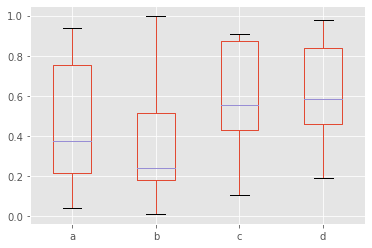

In [64]:
df2.plot.box()

#### Hexagonal Bin Plot
Useful for Bivariate Data (alternative to scatterplot)

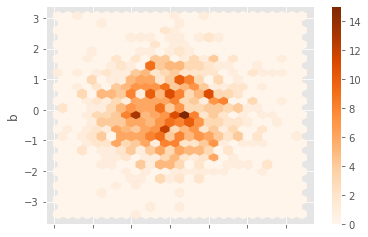

In [65]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

#### Kernel Density Estimation plot (KDE)

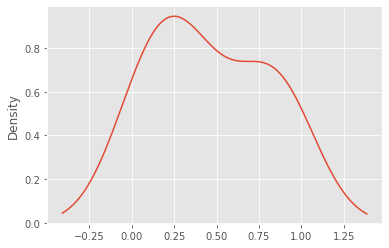

In [66]:
df2['a'].plot.kde()

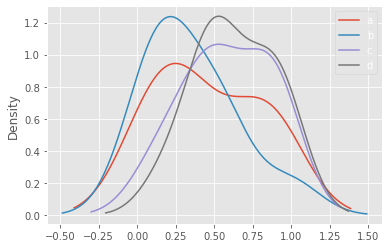

In [67]:
df2.plot.density()